<a href="https://colab.research.google.com/github/servetgulnaroglu/Forecasting/blob/task5/notebooks/n5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='#475468'> Fashion Item Recognition:</font>
<font color='#475468'> Can you predict clothing items from fashion images?</font>

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Data

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
dfDgt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist_fashion_train.csv')
dfDgt.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


WHITEBOARD >>

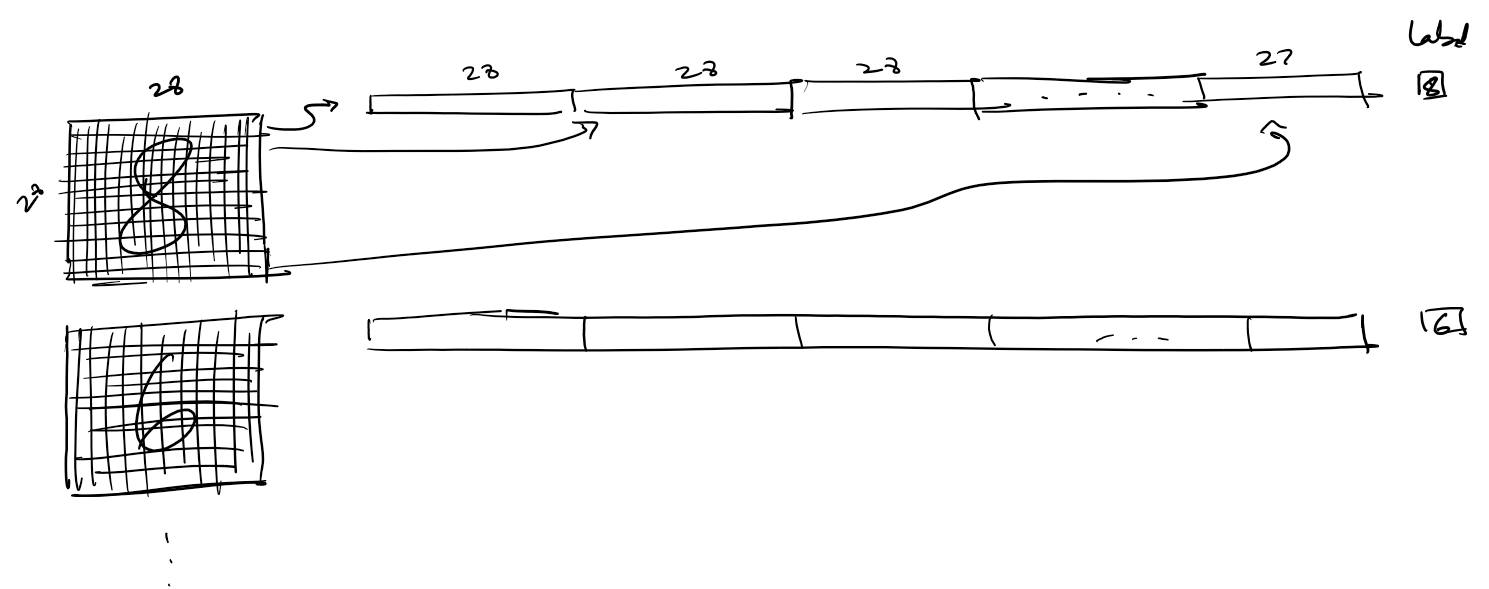

<< WHITEBOARD

In [11]:
dfDgt.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,4457.000000,4457.0,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000
mean,4.489118,0.0,0.010770,0.057438,0.133049,0.273502,0.481041,0.957819,2.531299,6.024007,...,35.796051,23.532645,15.896118,16.512004,22.909132,18.534665,8.869195,2.805026,0.879515,0.066861
std,2.860056,0.0,0.397897,1.957315,2.406422,4.054432,6.459594,8.999752,14.930884,24.463574,...,58.468991,49.279521,41.345739,42.880658,52.647481,46.173004,29.700339,17.410489,9.002796,2.067970
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,60.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,0.0,25.000000,119.000000,80.000000,123.000000,230.000000,195.000000,186.000000,223.000000,...,255.000000,255.000000,241.000000,247.000000,249.000000,247.000000,238.000000,231.000000,202.000000,122.000000


In [12]:
# Define target and features
y = dfDgt['label'].values
X = scale(dfDgt.drop(['label'], axis=1).values)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)


## Analyze Data

Handwriting 				 Label
AxesImage(size=(28, 28)) 		 9


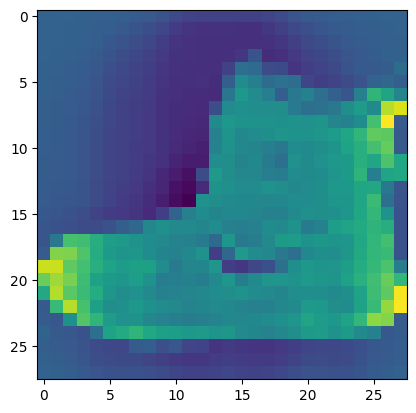

In [13]:
# Display first image
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

<Axes: ylabel='count'>

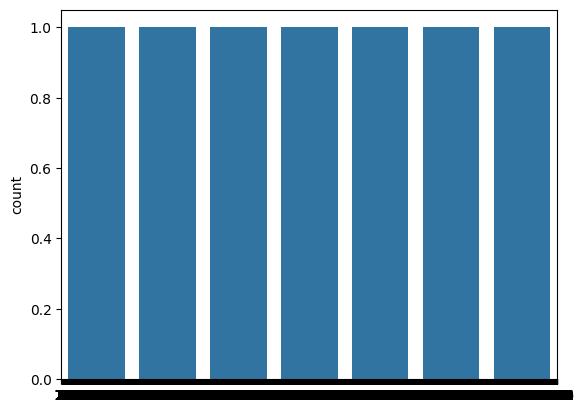

In [14]:
# Plot count of digit types
sns.countplot(y)

The data set seems fairly balanced.  In other words, there are enough samples of each digit.  If not, we would have needed to re-balance the dataset.

## Predict Fashion Item from Image
Since **SVM** is a tool we already know, let's start with that.

In [15]:
%%time

# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

mdlSvmDgt = SVC()
mdlSvmDgt.fit(X_train, y_train)
y_test_pred = mdlSvmDgt.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        93
           1       0.99      0.95      0.97       100
           2       0.74      0.77      0.75        87
           3       0.85      0.89      0.87        81
           4       0.76      0.77      0.76        95
           5       0.91      0.91      0.91        79
           6       0.62      0.55      0.58        88
           7       0.91      0.90      0.90        87
           8       0.92      0.98      0.95        90
           9       0.91      0.92      0.92        92

    accuracy                           0.85       892
   macro avg       0.84      0.84      0.84       892
weighted avg       0.84      0.85      0.84       892

CPU times: user 4.06 s, sys: 28.6 ms, total: 4.09 s
Wall time: 4.95 s


While Support Vector Machines create a boundary that maximize the margin between the different classes, it takes a very long time.  Let's attempt a different way of solving this perhaps by mimicing the way we classify images in our brain...

### Neural Network

WHITEBOARD >>

This is how our brain breaks down an image...  and like in pictionary we try to figure out the image from components of it...

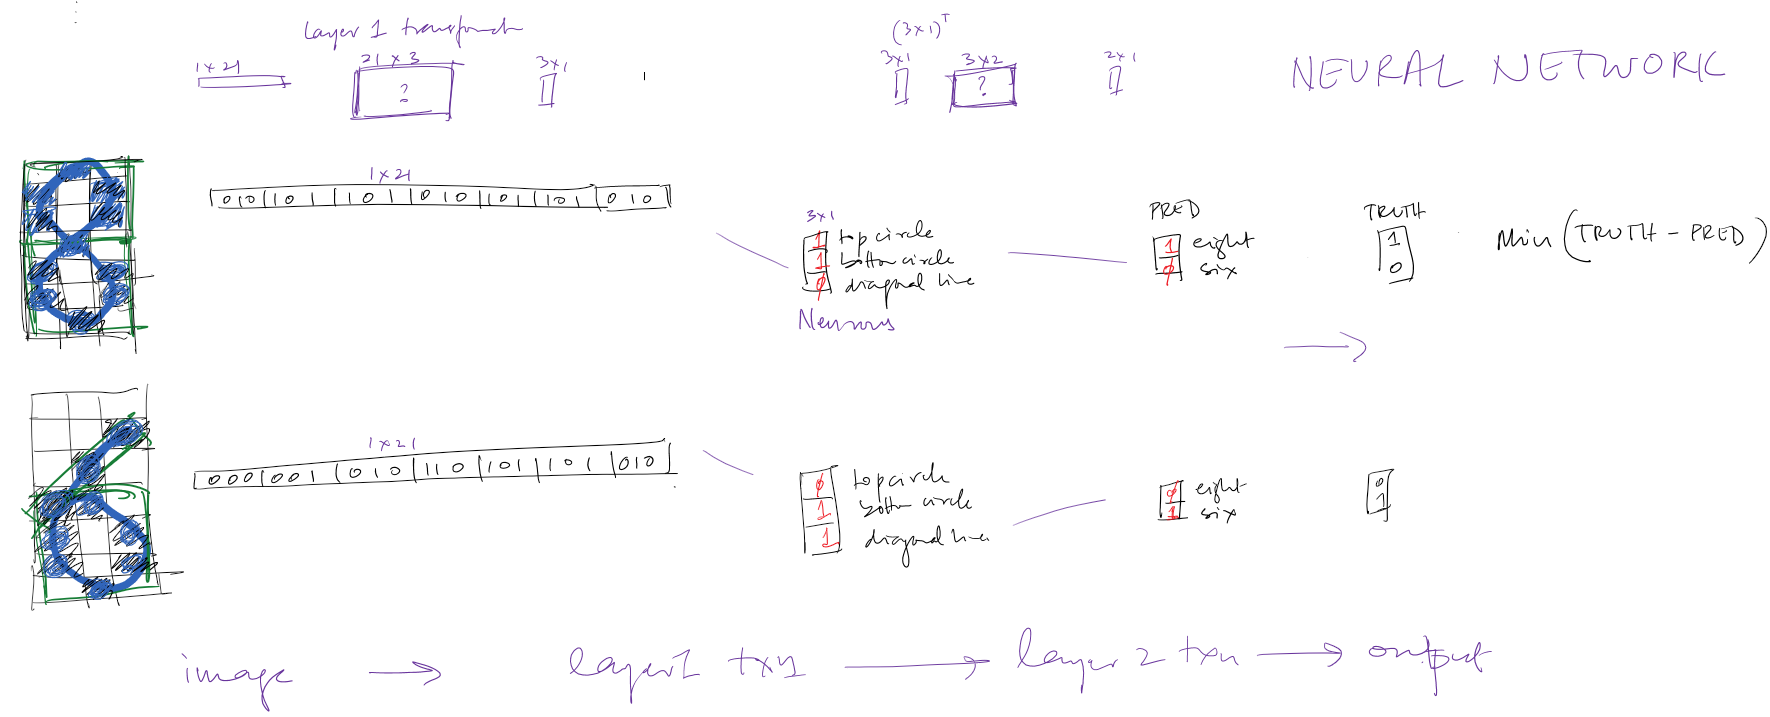

So... Neural Networks mimic the neurons in the brain in that input values are taken and transformed collectively to generate the output.  

Now, in our example, the transformation matrices - which are WEIGHTS and BIASES need to be iteratively set in a way that minimizes error of a wrong prediction.

Let's calculate this manually in Excel (but Neural Networks essentially do this for you)...

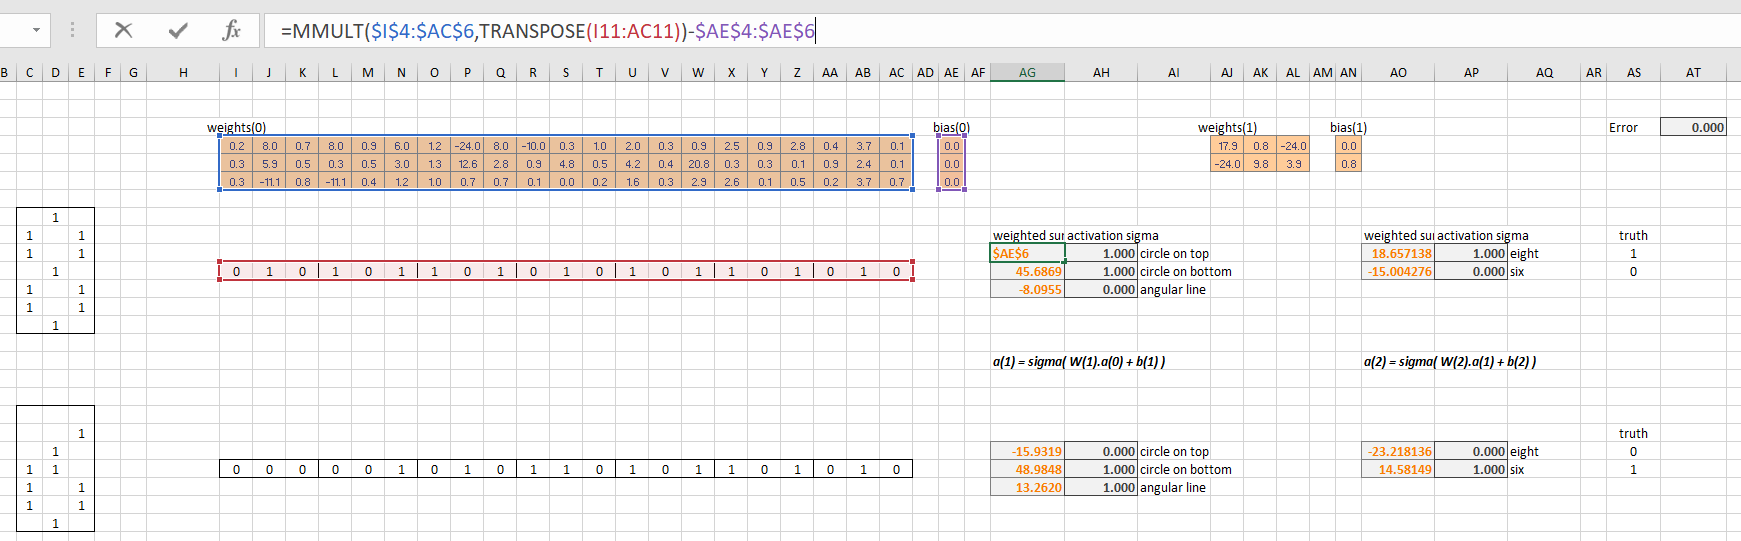

And now, let's solve for the weights and biases using Excel solver.

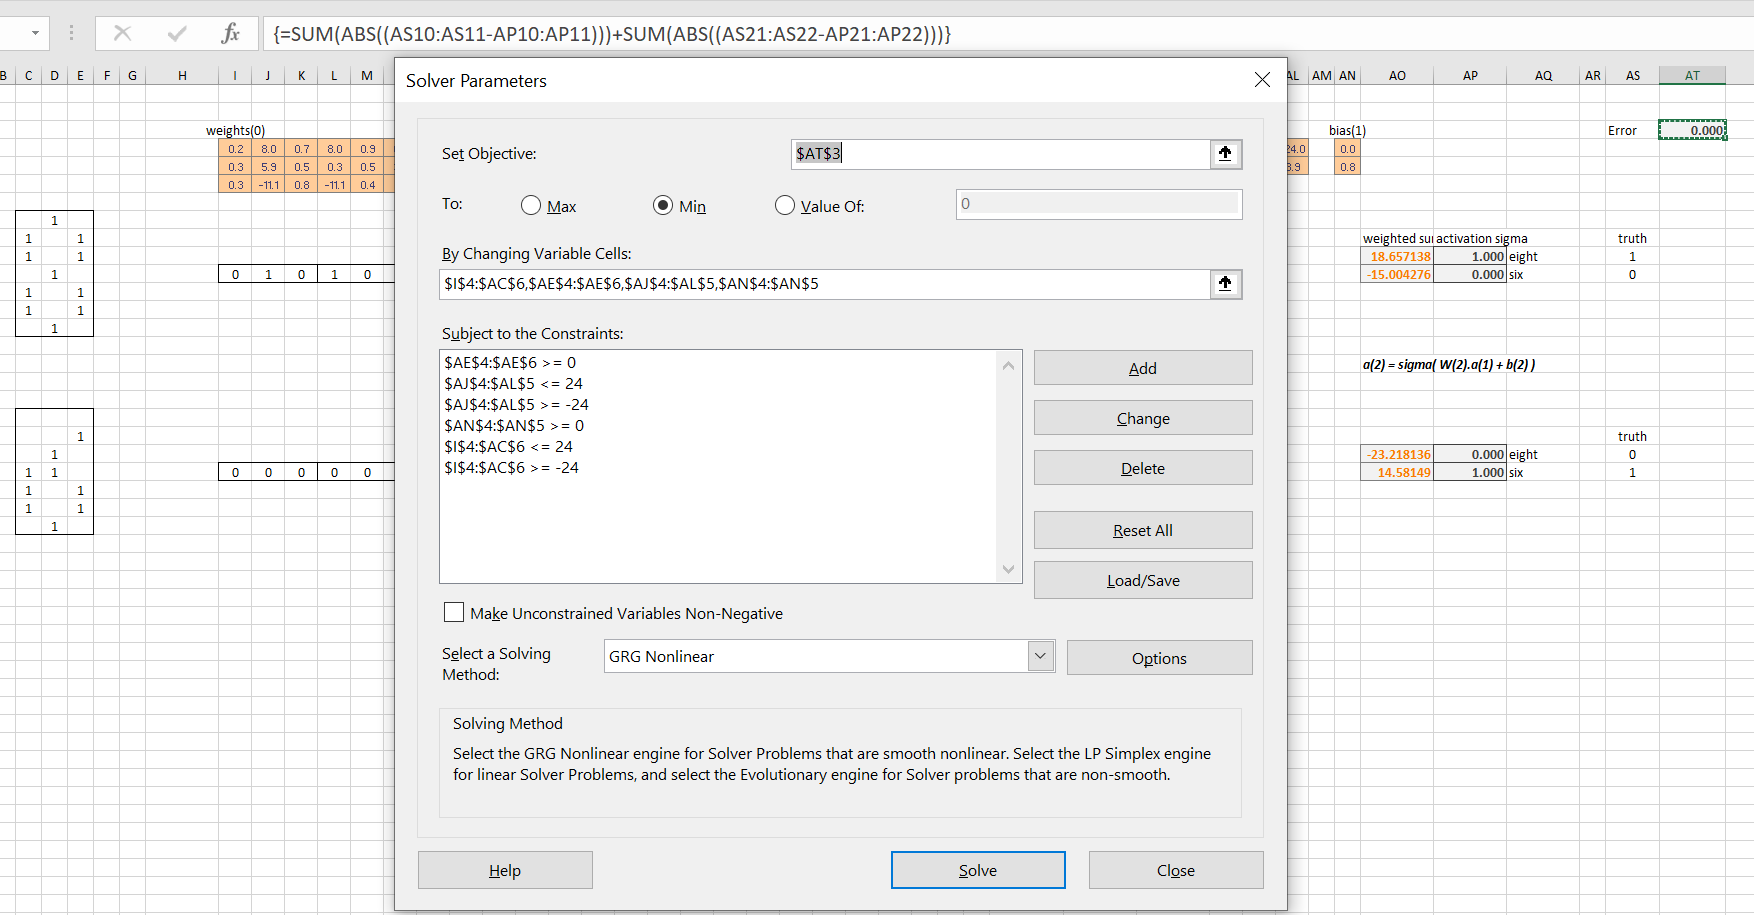

Neural Network libraries are efficient in solving for these weights and biases in large matrices... but they are not very explainable unless you define the layers in a meaningful manner.

<< WHITEBOARD

In [16]:
%%time

# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncDgt = MLPClassifier()
mdlNncDgt.fit(X_train, y_train)
y_test_pred = mdlNncDgt.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        93
           1       0.98      0.97      0.97       100
           2       0.73      0.76      0.75        87
           3       0.88      0.89      0.88        81
           4       0.76      0.78      0.77        95
           5       0.94      0.92      0.93        79
           6       0.66      0.61      0.64        88
           7       0.91      0.94      0.93        87
           8       0.98      0.94      0.96        90
           9       0.95      0.93      0.94        92

    accuracy                           0.86       892
   macro avg       0.86      0.86      0.86       892
weighted avg       0.86      0.86      0.86       892

CPU times: user 16.9 s, sys: 6.49 s, total: 23.4 s
Wall time: 16.3 s


Notice the Neural Network took a lot less time to get a more accurate result.  Now, let's see how this performs on data it has never seen before...

In [18]:
# Load Data for Scoring
X_score = scale(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist_fashion_test.csv'))

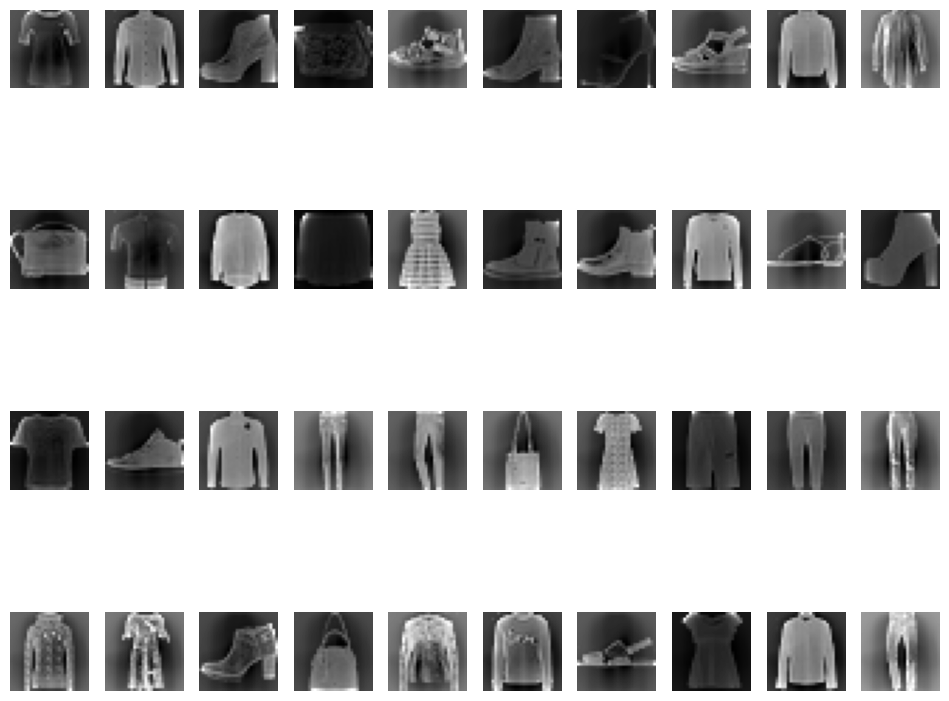

In [20]:
# Visualize Sample Images
plt.figure(figsize=(12, 10))
col, row = 10, 4
for i in range(col * row):
    plt.subplot(row, col, i + 1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')
plt.show()

In [23]:
# Show predicted digits
X_score = X_test[:, 1:] if X_test.shape[1] == 785 else X_test

print('Predicted Digits (Neural Network):')
for i in range(col*row):
    if np.mod(i,col) == 0:
        print('\n')
    print(mdlNncDgt.predict(X_score)[i], end=' ')

Predicted Digits (Neural Network):


0 6 9 8 7 9 5 5 4 2 

8 0 6 8 3 9 9 2 5 9 

0 7 6 1 1 8 3 1 1 1 

2 3 9 8 6 2 5 6 6 1 

Let's see if this result can be further improved by tweaking the network...

utexas_ds_orie_divider_gray.png

### Deep Neural Network

Adding additional hidden layers in between the input and output layers could improve the solution.  Such models are known as **Deep Neural Network** models.

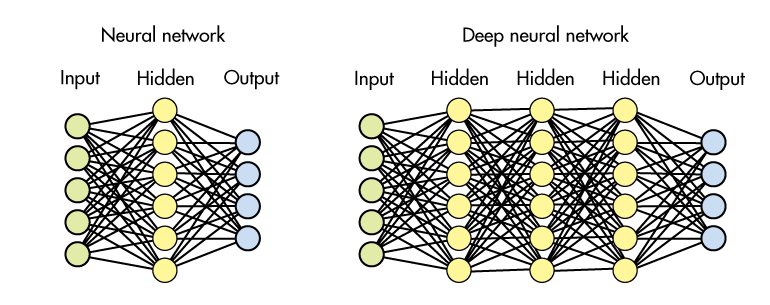

In [24]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
mdlDncDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncDgt.fit(X_train, y_train)
y_test_pred = mdlDncDgt.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        93
           1       0.98      0.98      0.98       100
           2       0.72      0.72      0.72        87
           3       0.89      0.91      0.90        81
           4       0.76      0.79      0.77        95
           5       0.92      0.91      0.92        79
           6       0.63      0.55      0.59        88
           7       0.91      0.93      0.92        87
           8       0.95      0.97      0.96        90
           9       0.93      0.93      0.93        92

    accuracy                           0.86       892
   macro avg       0.85      0.85      0.85       892
weighted avg       0.85      0.86      0.85       892

CPU times: user 12.9 s, sys: 5.35 s, total: 18.3 s
Wall time: 11.7 s


### Cross Validation

WHITEBOARD >>

In addition to the typical train/test split, it helps to run multiple experiments in which the train/test data is different.  Suppose the data is being split train-80%/test-20%, then there are 5 different experiments that can be run in which each data point is part of the test set at least once.  So, let's break up the data into multiple train/test splits and **cross-validate** across all to make sure the model works well.

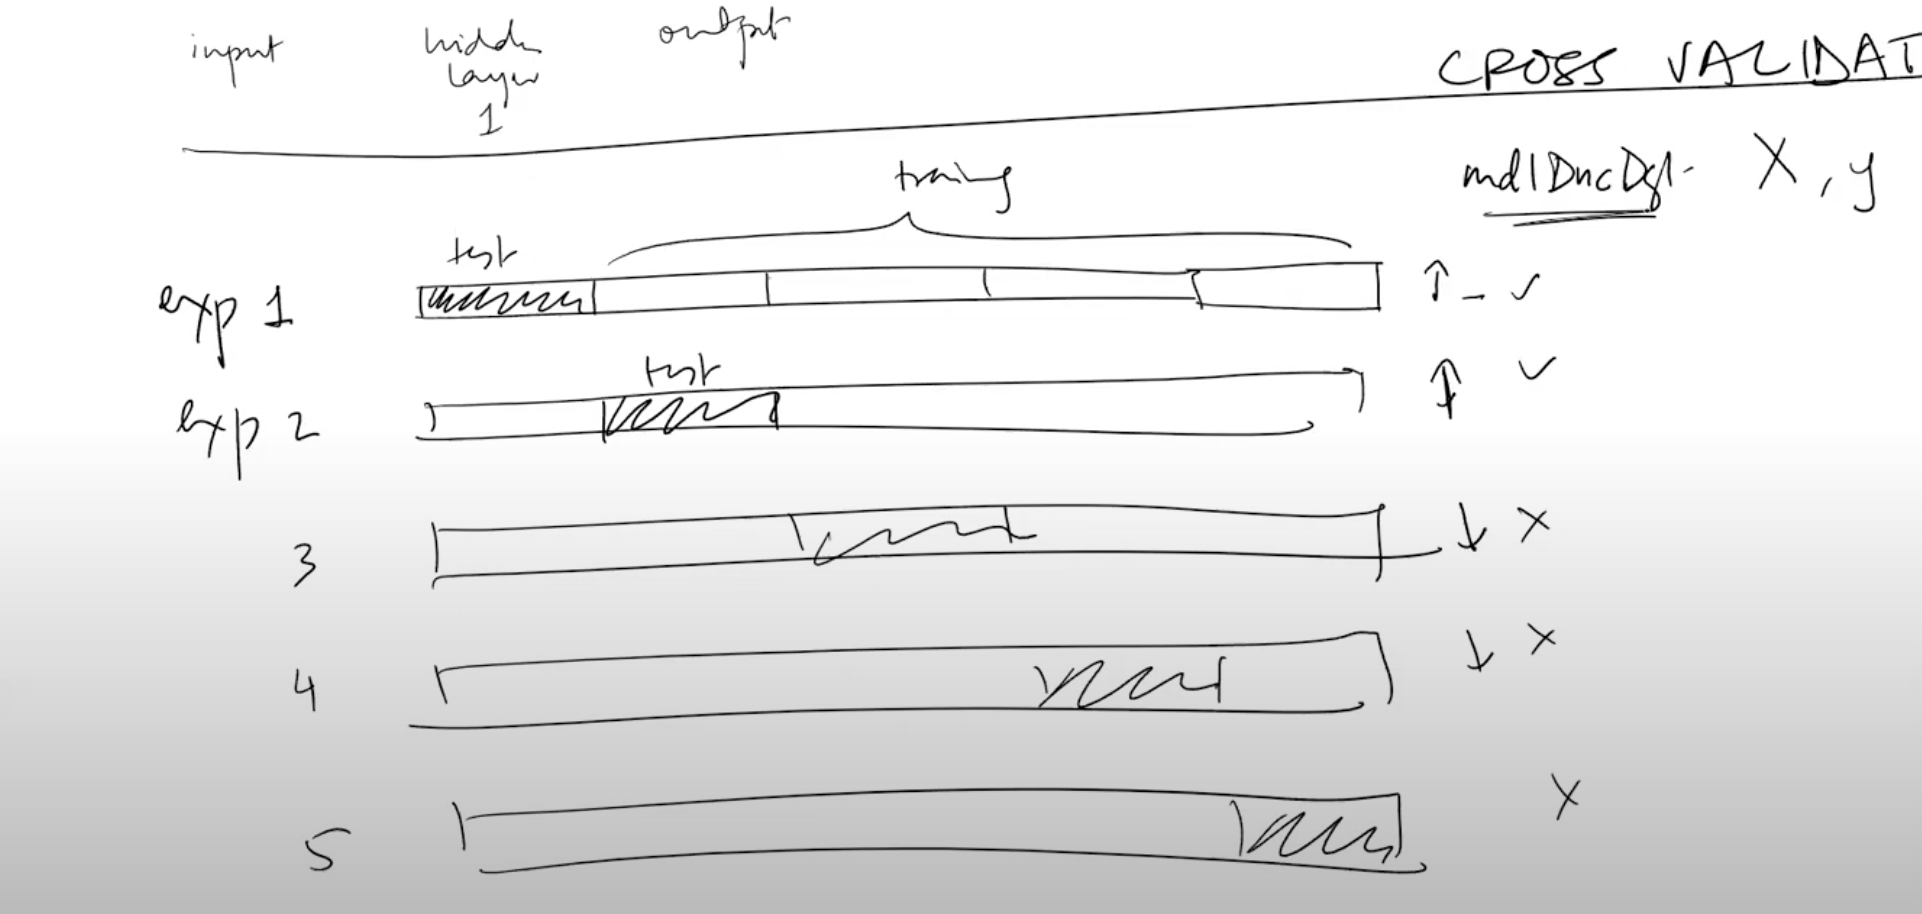

<< WHITEBOARD

In [25]:
# Cross-validate model across 5 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(mdlDncDgt, X, y, cv=5)

array([0.84080717, 0.8396861 , 0.84287318, 0.82940516, 0.84624018])

## Takeaways

* Solved a complex visual recognition problem faster by leveraging *Neural Networks*
* Improved the solution by adding additional layers into the Neural Network model known as *Deep Neural Networks*
* Evaluated the model across multiple experiments via *Cross-Validation*

#### WHITEBOARD >>

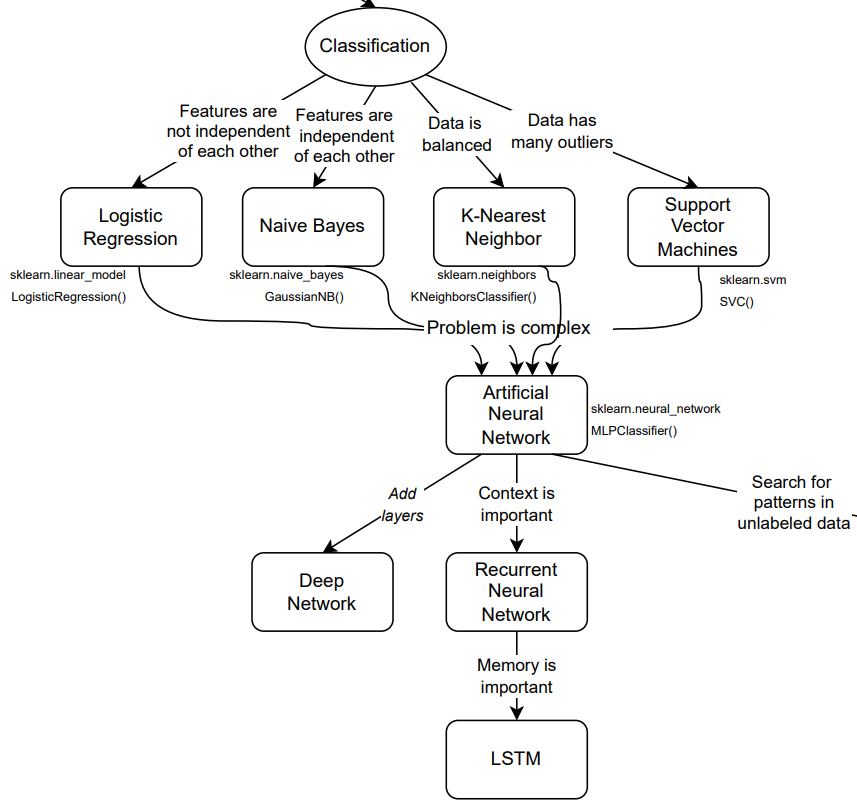

<< WHITEBOARD

utexas_ds_orie_divider_gray.png